<a href="https://colab.research.google.com/github/MaDhuManodya/Banana_Disease/blob/main/BananaDiseaseTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Nov 13 19:29:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 55.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image, clear_output

# Clear output to reset the display
clear_output()

# Run YOLO check mode
!yolo mode=check


# Initialize a YOLOv8 model
model = YOLO("yolov8n.pt")  # Replace with the specific model if needed

# Display model information
model.info()

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 905, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=check'. Valid modes are {'train', 'predict', 'benchmark', 'export', 'val', 'track'}.

    Arguments received: ['yolo', 'mode=check']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'detect', 'obb', 'classify', 'segment'}
                MODE (required) is one of {'train', 'predict', 'benchmark', 'export', 'val', 'track'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with

100%|██████████| 6.25M/6.25M [00:00<00:00, 310MB/s]


YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wwHJ522BSP0PWIvcvEHI")
project = rf.workspace("madu").project("puwalubanana-disease")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to puwalubanana-disease-2 in yolov8:: 100%|██████████| 773/773 [00:00<00:00, 7534.14it/s]


In [ ]:
!yolo train model=yolov8n.pt data=/content/puwalubanana-disease-2/data.yaml epochs=100 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/puwalubanana-disease-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

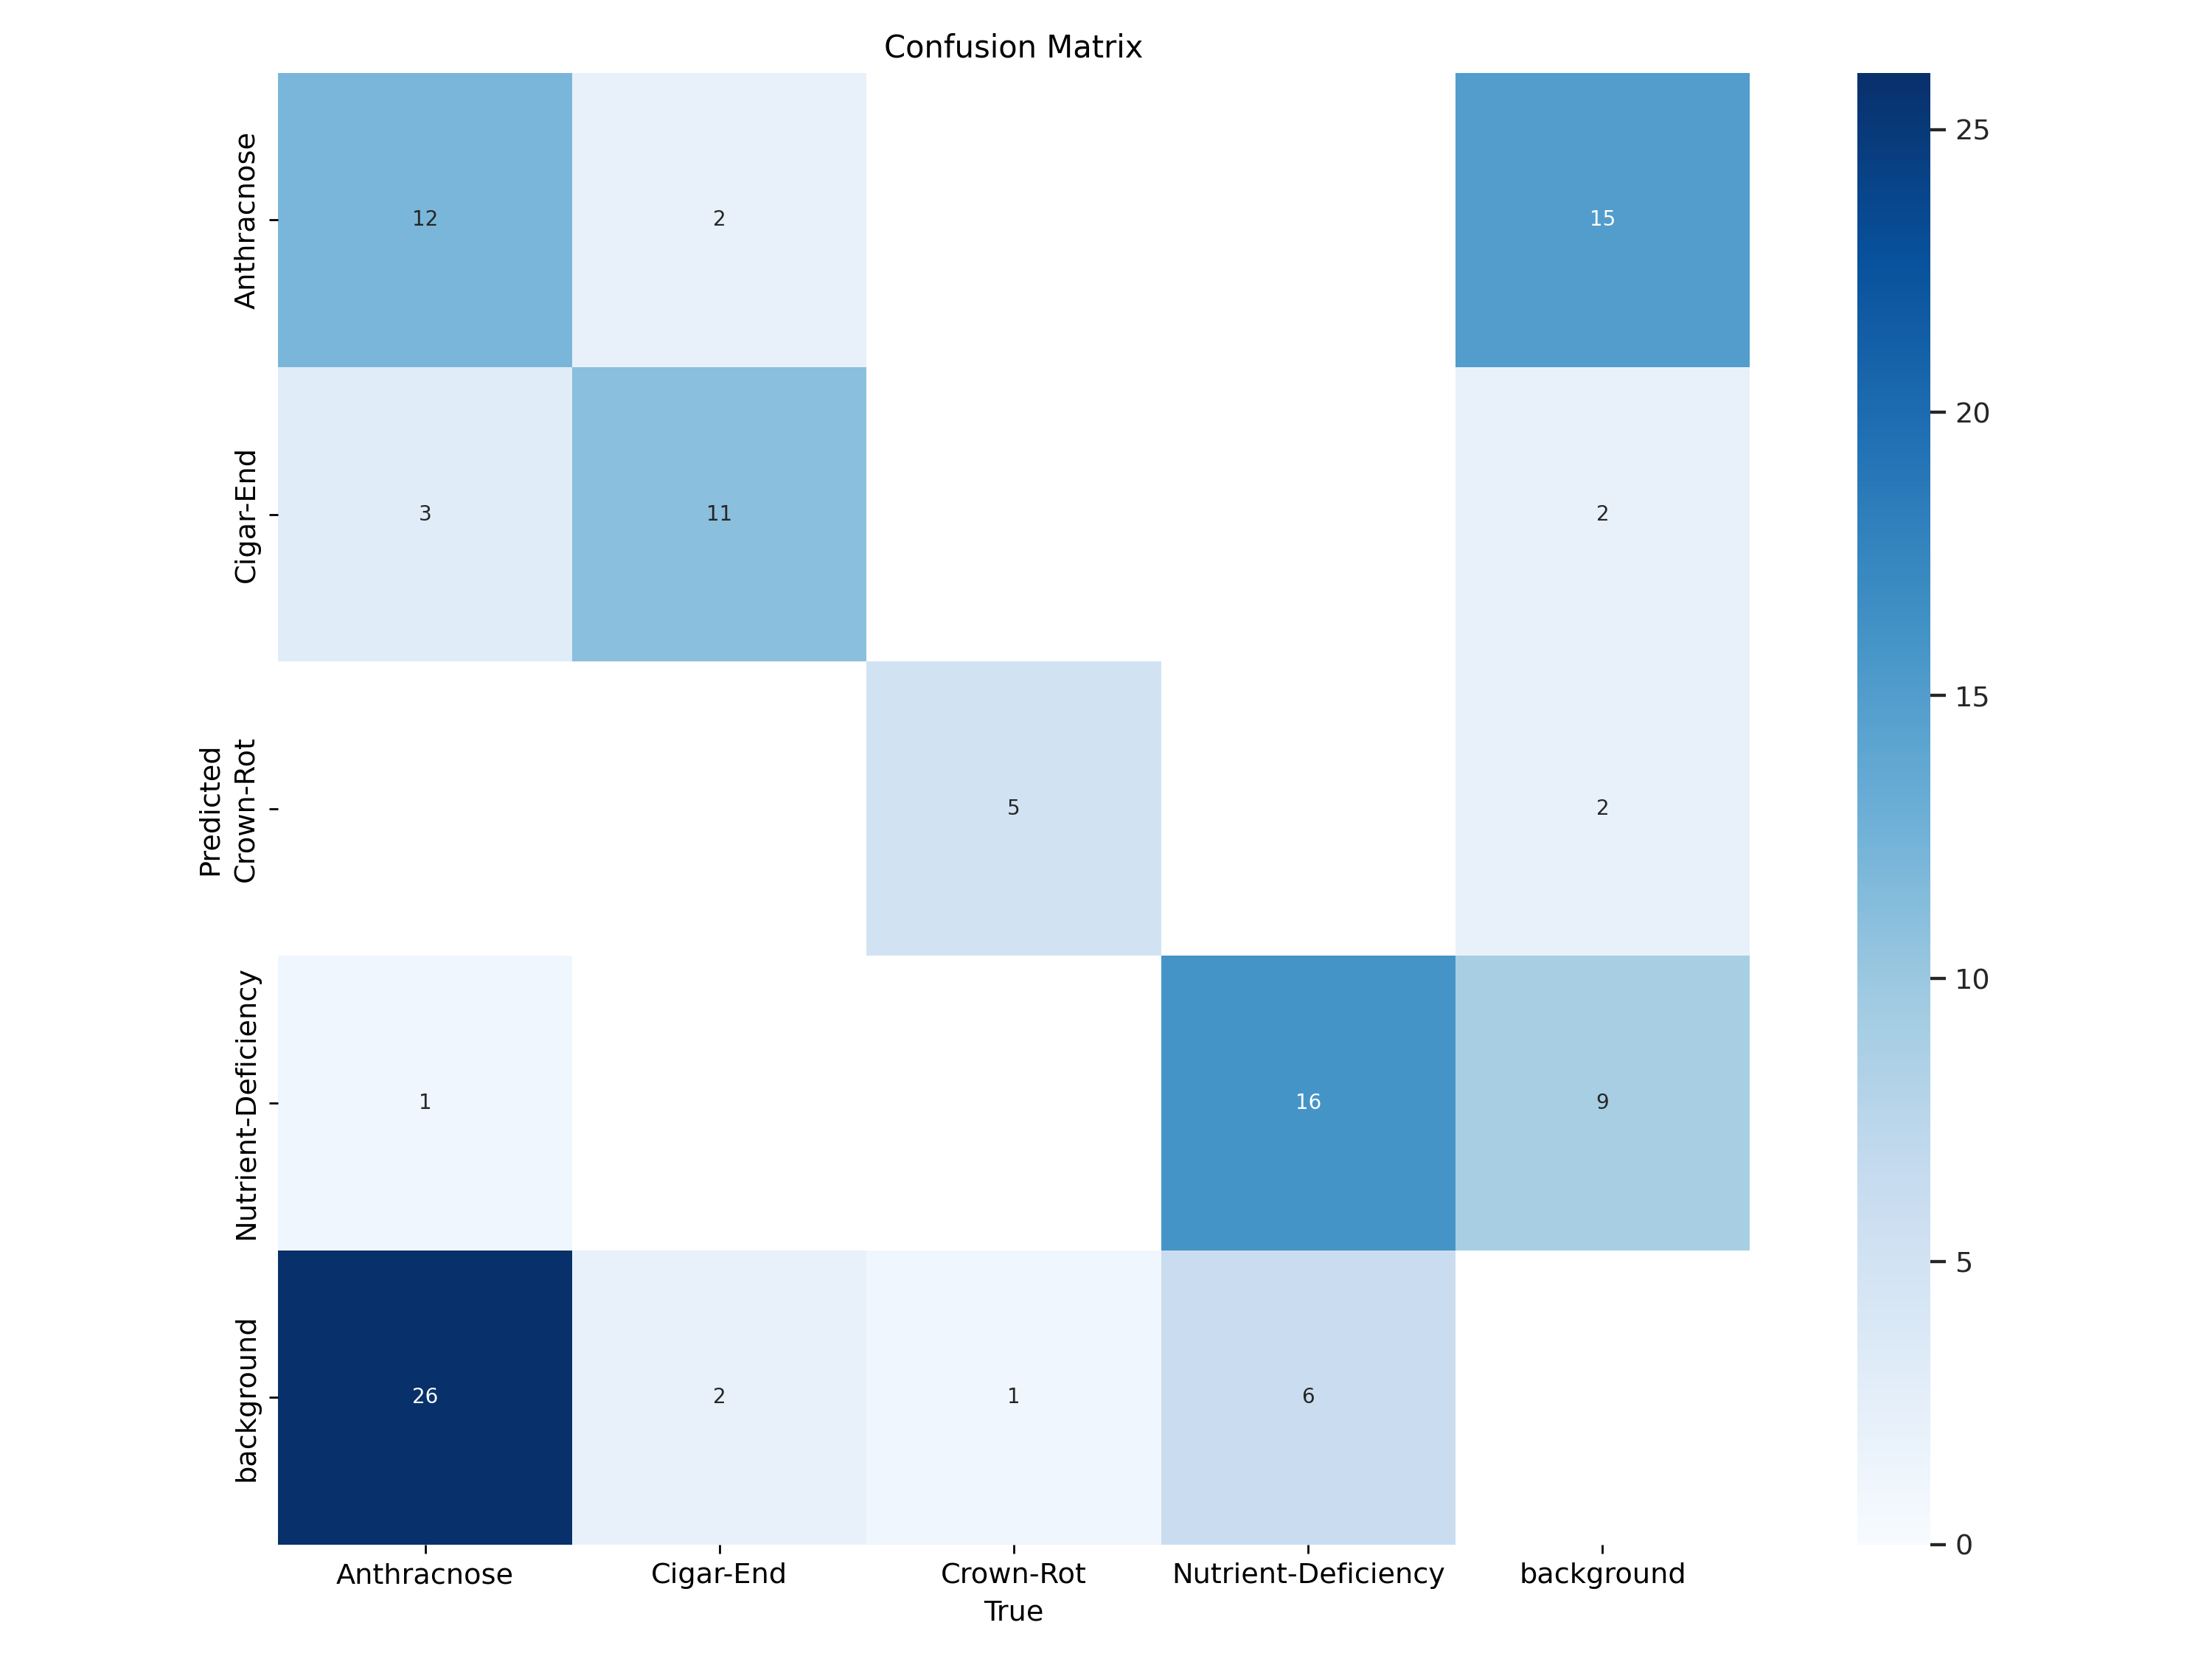

In [ ]:

Image (filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

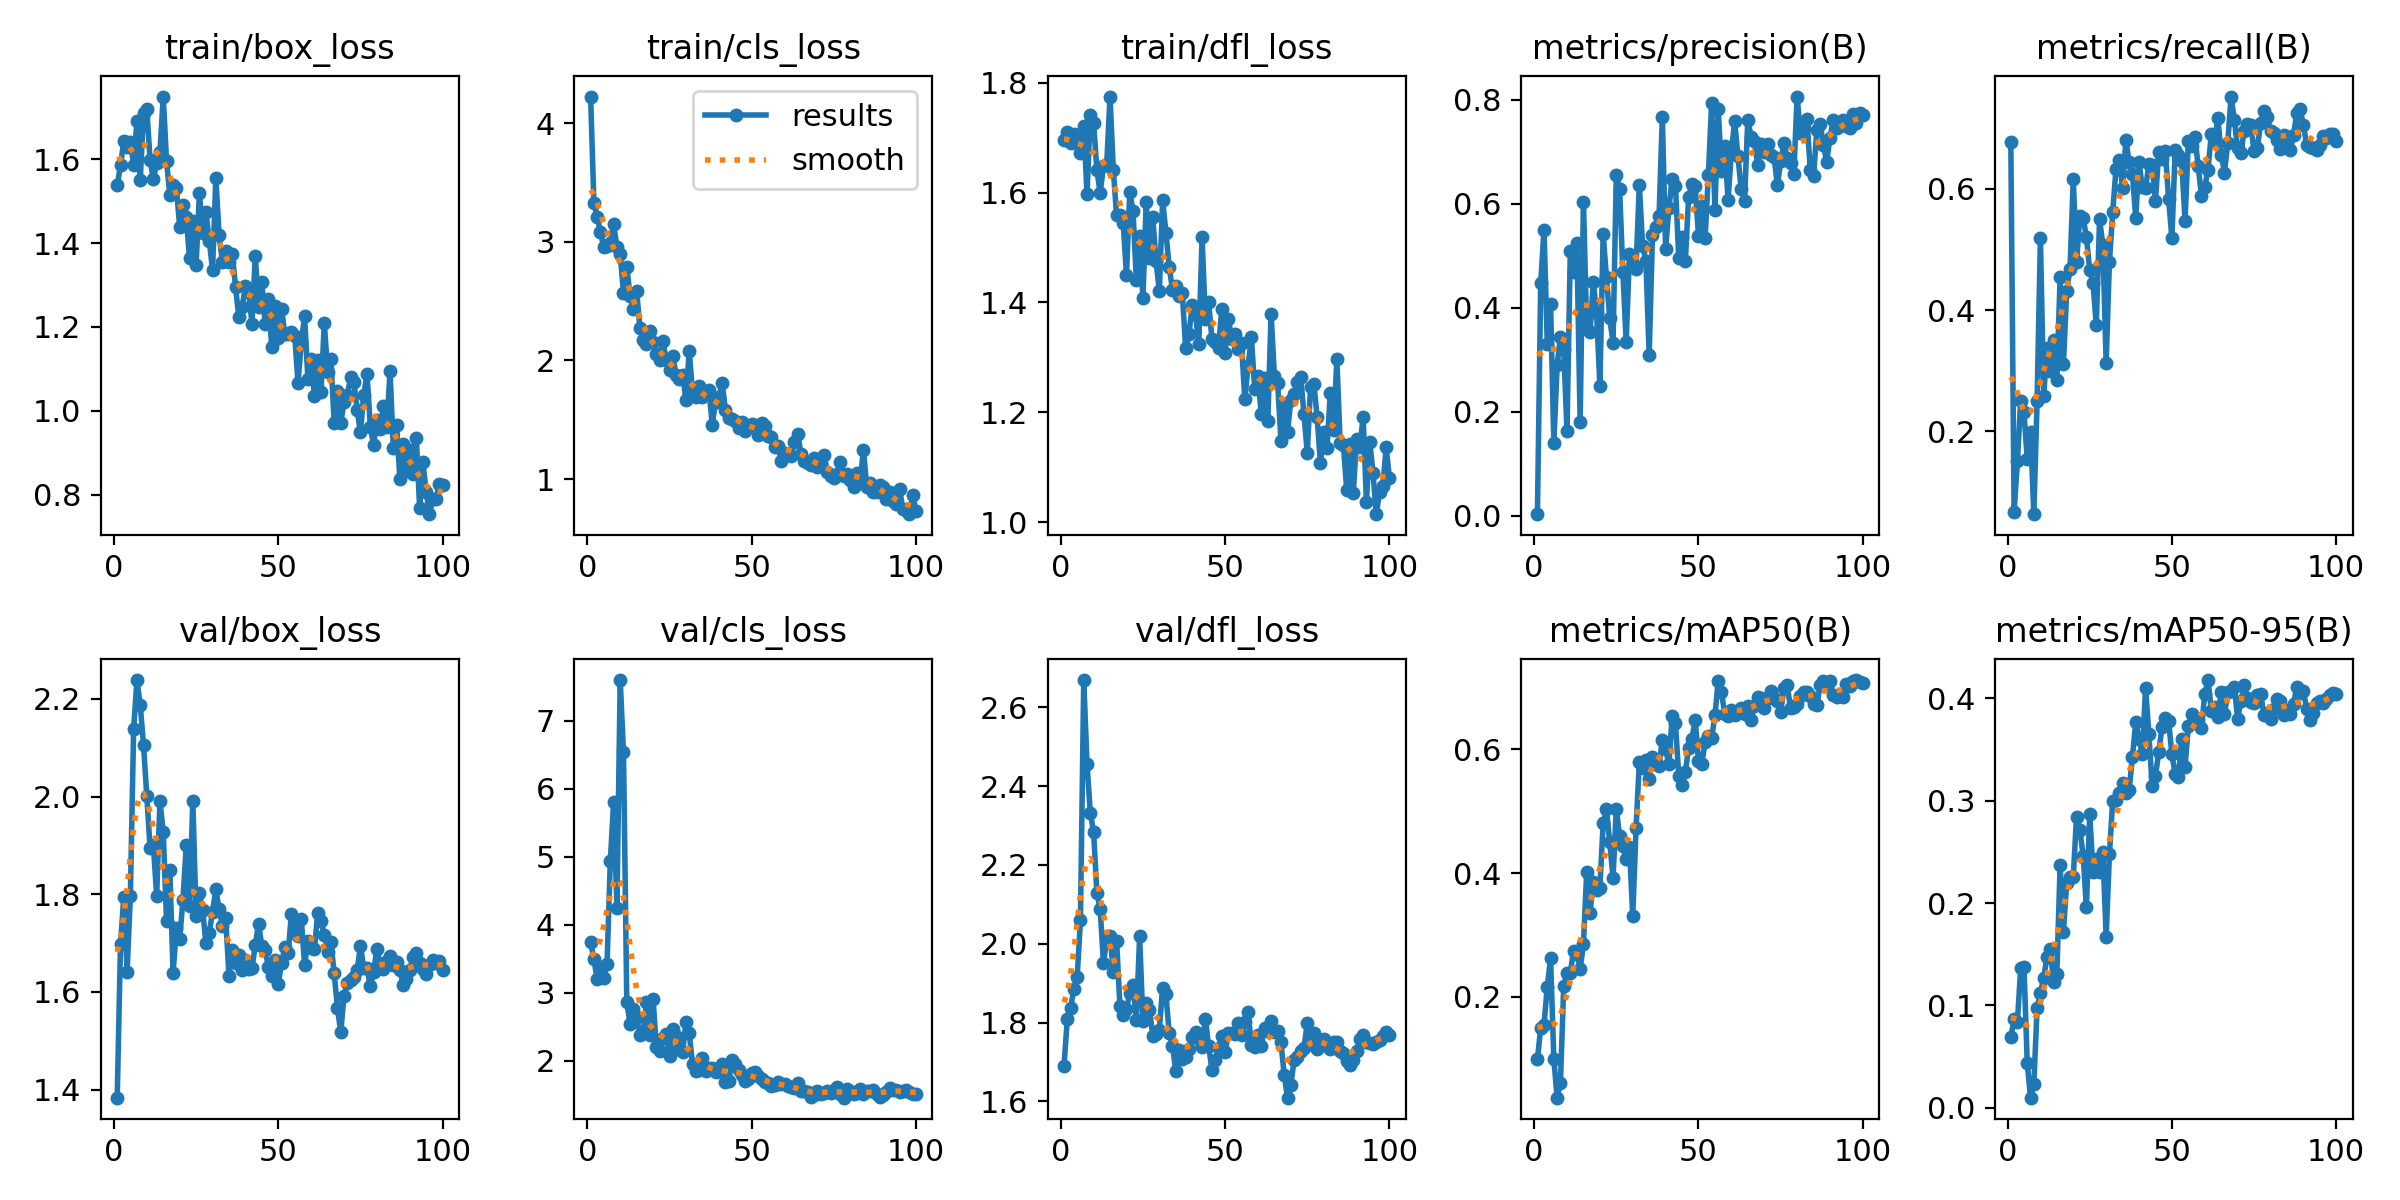

In [ ]:
Image (filename=f'/content/runs/detect/train/results.png', width=600)


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/puwalubanana-disease-2/test/images

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

image 1/37 /content/puwalubanana-disease-2/test/images/IMG_2701_jpg.rf.5a72affe3d434244f7a425de36f19d0f.jpg: 640x640 1 Nutrient-Deficiency, 12.3ms
image 2/37 /content/puwalubanana-disease-2/test/images/IMG_2703_jpg.rf.928741764d7f4d9b584cdc426b73de16.jpg: 640x640 2 Nutrient-Deficiencys, 10.5ms
image 3/37 /content/puwalubanana-disease-2/test/images/IMG_2709_jpg.rf.5acba363d00b60122e4768b1c0a4503f.jpg: 640x640 (no detections), 9.2ms
image 4/37 /content/puwalubanana-disease-2/test/images/IMG_2716_jpg.rf.437ed1575cd367ac02d2a27bf6b0f8cc.jpg: 640x640 1 Nutrient-Deficiency, 9.7ms
image 5/37 /content/puwalubanana-disease-2/test/images/IMG_2723_jpg.rf.e21997e37b8603a57d0c1a6904ac8f19.jpg: 640x640 1 Nutrient-Deficiency, 8.8ms
image 6/37 /content/puwalubanana-disease-2/test/images/IMG_2728_jpg.rf.836eb89cc7092c33a75a45a3354d1463.jpg: 

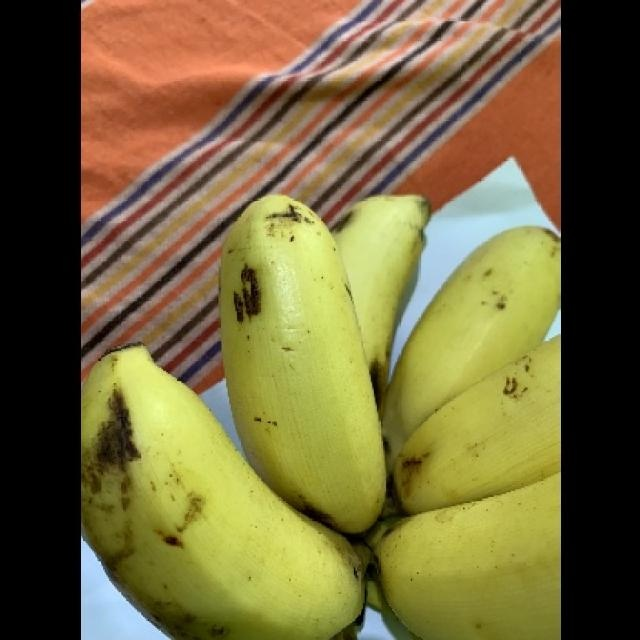

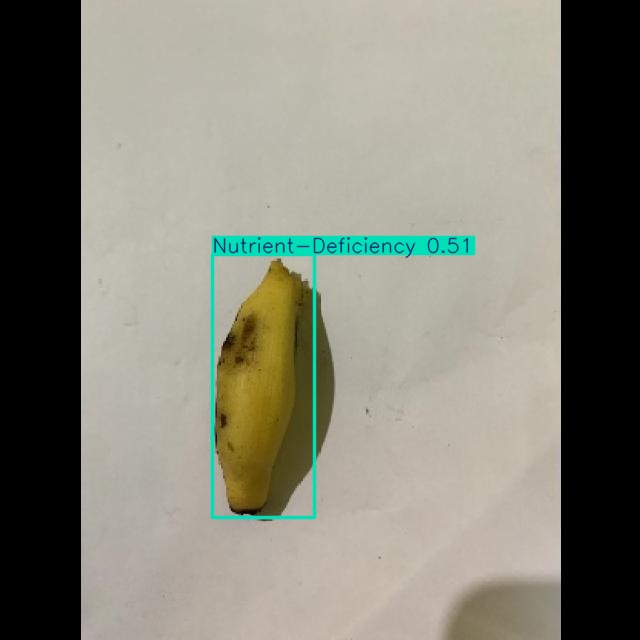

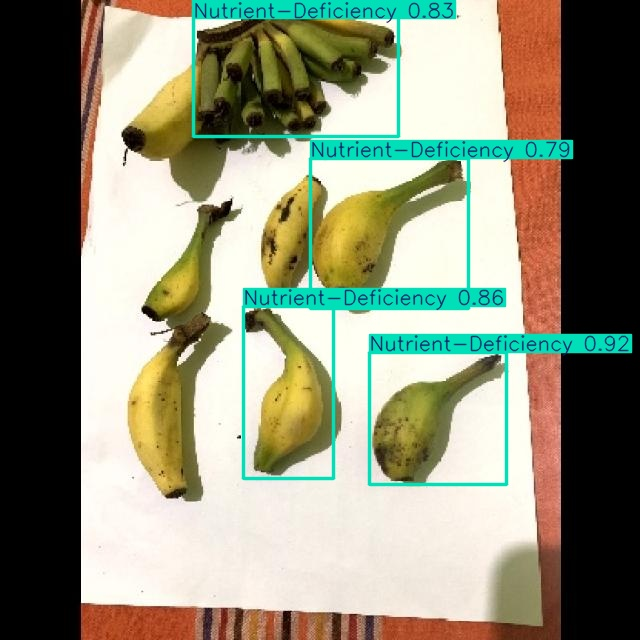

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path, width=600))

In [ ]:
from google.colab import files

# Compress and download
!zip -r yolo_training_files.zip runs/detect/train
files.download("yolo_training_files.zip")


  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/P_curve.png (deflated 7%)
  adding: runs/detect/train/results.png (deflated 6%)
  adding: runs/detect/train/args.yaml (deflated 53%)
  adding: runs/detect/train/confusion_matrix.png (deflated 28%)
  adding: runs/detect/train/val_batch0_labels.jpg (deflated 14%)
  adding: runs/detect/train/val_batch0_pred.jpg (deflated 14%)
  adding: runs/detect/train/train_batch1710.jpg (deflated 9%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/best.pt (deflated 10%)
  adding: runs/detect/train/weights/last.pt (deflated 10%)
  adding: runs/detect/train/R_curve.png (deflated 11%)
  adding: runs/detect/train/PR_curve.png (deflated 13%)
  adding: runs/detect/train/labels_correlogram.jpg (deflated 44%)
  adding: runs/detect/train/results.csv (deflated 61%)
  adding: runs/detect/train/train_batch1712.jpg (deflated 16%)
  adding: runs/detect/train/val_batch1_pred.jpg (deflated 12%)
  adding: runs/dete

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>